## <span style = "color: green"> Employee Attrition Classification </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField' ,'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]

for column in categorical_columns:
    print(f'Unique values in {column} are:{df[column].unique()}')

Unique values in Attrition are:['Yes' 'No']
Unique values in BusinessTravel are:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department are:['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField are:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender are:['Female' 'Male']
Unique values in JobRole are:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus are:['Single' 'Married' 'Divorced']
Unique values in Over18 are:['Y']
Unique values in OverTime are:['Yes' 'No']


In [11]:
column = df.columns

for i in column:
    print(f"Unique values in {i} are: {df[i].nunique()}")

Unique values in Age are: 43
Unique values in Attrition are: 2
Unique values in BusinessTravel are: 3
Unique values in DailyRate are: 886
Unique values in Department are: 3
Unique values in DistanceFromHome are: 29
Unique values in Education are: 5
Unique values in EducationField are: 6
Unique values in EmployeeCount are: 1
Unique values in EmployeeNumber are: 1470
Unique values in EnvironmentSatisfaction are: 4
Unique values in Gender are: 2
Unique values in HourlyRate are: 71
Unique values in JobInvolvement are: 4
Unique values in JobLevel are: 5
Unique values in JobRole are: 9
Unique values in JobSatisfaction are: 4
Unique values in MaritalStatus are: 3
Unique values in MonthlyIncome are: 1349
Unique values in MonthlyRate are: 1427
Unique values in NumCompaniesWorked are: 10
Unique values in Over18 are: 1
Unique values in OverTime are: 2
Unique values in PercentSalaryHike are: 15
Unique values in PerformanceRating are: 2
Unique values in RelationshipSatisfaction are: 4
Unique values

#### Print out the names of the columns having only one unique values 

In [12]:
columns = df.columns[df.nunique() ==1]

for column in columns:
    print(f"{column}")

EmployeeCount
Over18
StandardHours


In [13]:
df.drop(columns = ["EmployeeCount", "Over18", "StandardHours"] , inplace = True)

In [14]:
df.drop(columns = ["EmployeeNumber"], inplace = True)

In [15]:
df.groupby(['Department','EducationField']).Gender.value_counts()

Department              EducationField    Gender
Human Resources         Human Resources   Male       19
                                          Female      8
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Male       11
                                          Female      2
                        Other             Male        3
                        Technical Degree  Male        3
                                          Female      1
Research & Development  Life Sciences     Male      274
                                          Female    166
                        Medical           Male      211
                                          Female    152
                        Other             Male       39
                                          Female     25
                        Technical Degree  Male       58
                                          Female     36

## <span style = "color: orange"> Data Visualization </span>

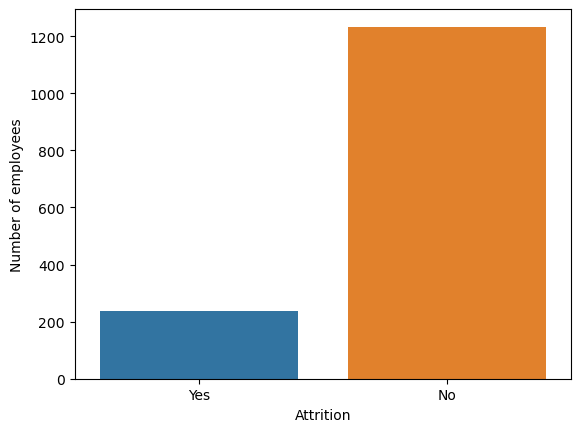

In [16]:
sns.countplot(x ='Attrition', data = df)
plt.ylabel('Number of employees')
plt.show()

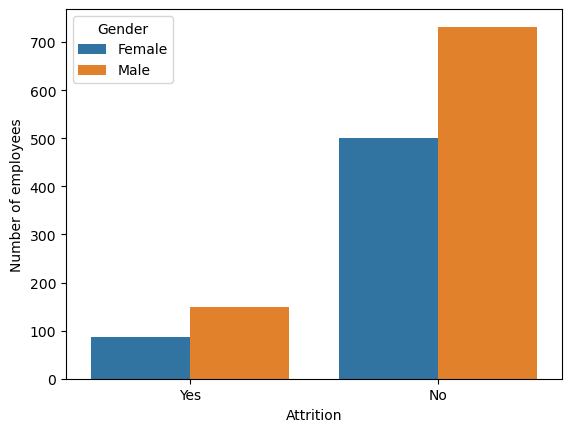

In [17]:
sns.countplot(x ='Attrition', hue ='Gender', data = df)
plt.ylabel('Number of employees')
plt.show()

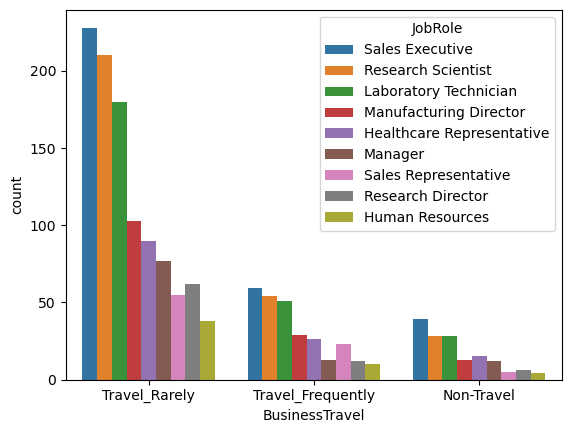

In [18]:
sns.countplot(x ='BusinessTravel', hue ='JobRole', data = df)
plt.show()

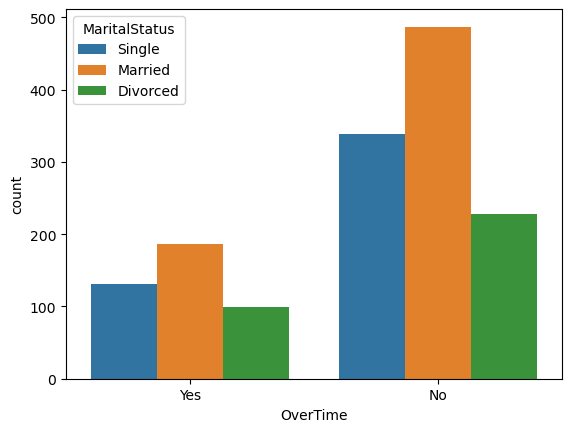

In [19]:
sns.countplot(x ='OverTime', hue ='MaritalStatus', data = df)
plt.show()

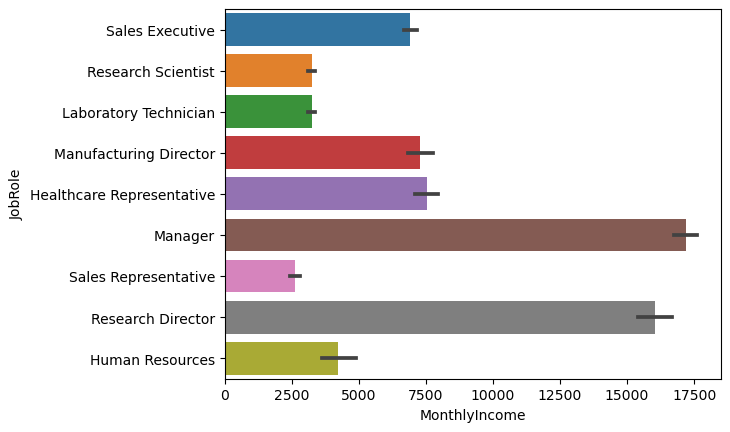

In [20]:
sns.barplot(y = df['JobRole'], x = df['MonthlyIncome'])
plt.show()

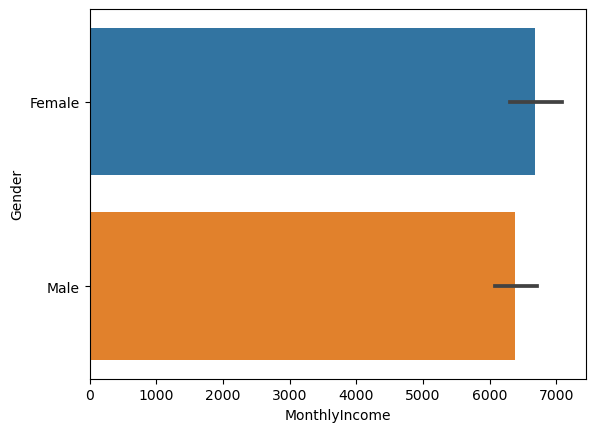

In [21]:
sns.barplot(y = df['Gender'], x = df['MonthlyIncome'])
plt.show()

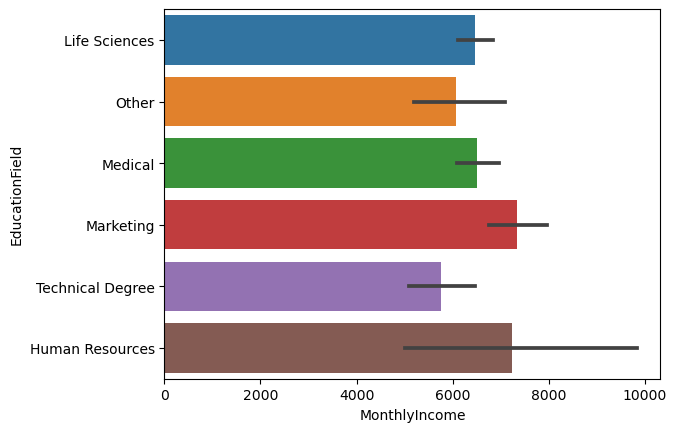

In [22]:
sns.barplot(y = df['EducationField'], x = df['MonthlyIncome'])
plt.show()

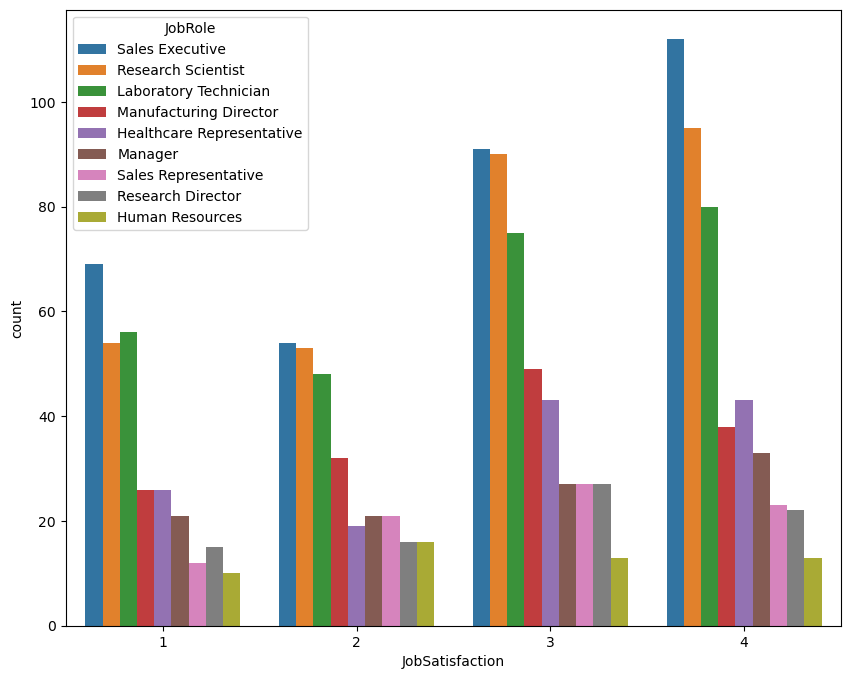

In [23]:
plt.figure(figsize =(10,8))
sns.countplot(x = df['JobSatisfaction'], hue = df['JobRole'] )
plt.show()

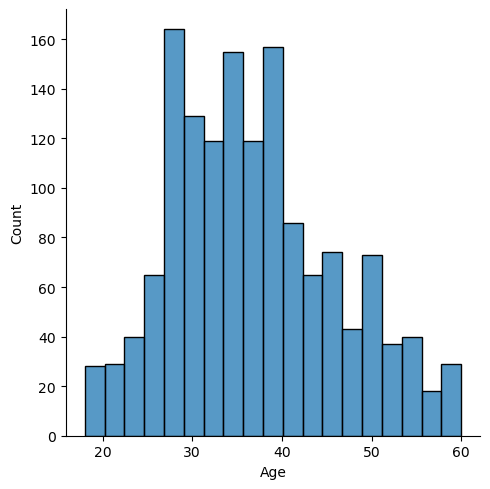

In [24]:
sns.displot(df['Age'])
plt.show()

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [25]:
def convert_attrition(value):
    if value == 'Yes':
        return 1
    else:
        return 0

In [26]:
df['Attrition'] = df['Attrition'].apply(convert_attrition)

In [27]:
df['Attrition'].unique()

array([1, 0], dtype=int64)

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


#### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [29]:
newdf= pd.get_dummies(df,drop_first=True)

In [30]:
newdf.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Check the shape of our new dataset

In [31]:
newdf.shape

(1470, 45)

#### Print unique values in our new dataframe

In [32]:
for i in newdf.columns:
    print(f'Unique values in {i} are:{newdf[i].unique()}')

Unique values in Age are:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique values in Attrition are:[1 0]
Unique values in DailyRate are:[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145

#### Split the columns into input and target variables (X and y)

In [33]:
X = newdf.drop(columns = ['Attrition'])
y = newdf['Attrition']

#### Carry out Feature scaling using StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_scaled = scaler.fit_transform(X)

In [37]:
X = pd.DataFrame(X_scaled,columns = X.columns)

In [38]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


#### Split the dataset into training and testing set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Machine Learning Models

#### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [85]:
model = LogisticRegression()
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=6, n_jobs=1, random_state=24)

In [86]:
y_pred = model.predict(X_test)

In [87]:
model.score(X_train,y_train)

0.8882410106899903

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
print('Accuracy score of our model is :',(accuracy_score(y_test,y_pred)))
print('Confusion matrix is :\n', (confusion_matrix(y_test,y_pred)))
print('Classification report is:\n',(classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score( LogisticRegression(),X_train,y_train,cv=2))}")

Accuracy score of our model is : 0.8639455782312925
Confusion matrix is :
 [[372   4]
 [ 56   9]]
Classification report is:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       376
           1       0.69      0.14      0.23        65

    accuracy                           0.86       441
   macro avg       0.78      0.56      0.58       441
weighted avg       0.84      0.86      0.82       441

Cross val score: 0.8571531109516075


<span style = "color:orange"> Visualize confusion matrix </span>

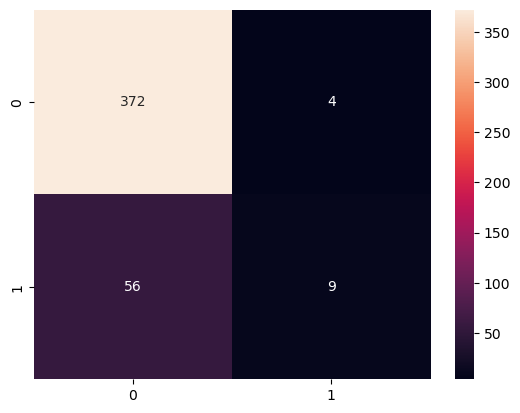

In [90]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.show()

#### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
model = RandomForestClassifier(n_estimators= 100)

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
params = {'max_depth':list(range(1,10)),'n_estimators':list(range(1,10)),'n_jobs':[1,2], 'random_state':list(range(1,50))}

In [52]:
clf = GridSearchCV(RandomForestClassifier(),params,cv=2,scoring='accuracy')

In [53]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_jobs': [1, 2],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [55]:
print('Best estimator is:', clf.best_estimator_)
print('Best parameters are:', clf.best_params_)
print('Best score is:',clf.best_score_)

Best estimator is: RandomForestClassifier(max_depth=9, n_estimators=9, n_jobs=1, random_state=24)
Best parameters are: {'max_depth': 9, 'n_estimators': 9, 'n_jobs': 1, 'random_state': 24}
Best score is: 0.8600600657323109


<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [56]:
model = RandomForestClassifier(max_depth=8, n_estimators=8, n_jobs=1, random_state=17)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=8, n_jobs=1, random_state=17)

In [57]:
y_pred = model.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=2))}")

Accuracy score is: 0.8616780045351474
Confusion matrix: 
 [[370   6]
 [ 55  10]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       376
           1       0.62      0.15      0.25        65

    accuracy                           0.86       441
   macro avg       0.75      0.57      0.59       441
weighted avg       0.83      0.86      0.82       441

Cross val score: 0.8513127573571078


<span style = "color:orange"> Visualize confusion matrix </span>

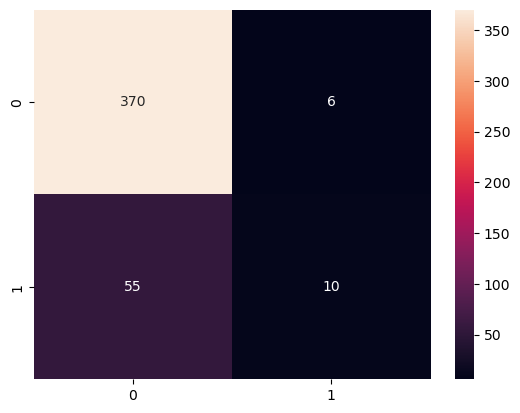

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

#### Support Vector Machine

In [60]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [61]:
params = {'C':list(range(1,10)), 'degree': [3, 4, 5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [62]:
clf=GridSearchCV(SVC(), params, cv=2)

In [63]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [65]:
print('Best estimator is: ', clf.best_estimator_)
print('Best parameters are: ', clf.best_params_)
print('Best score is:',clf.best_score_)

Best estimator is:  SVC(C=3, kernel='sigmoid')
Best parameters are:  {'C': 3, 'degree': 3, 'kernel': 'sigmoid'}
Best score is: 0.8600581768728042


In [66]:
model = SVC(C=2, degree=3, kernel='linear')
model.fit(X_train,y_train)

SVC(C=2, kernel='linear')

In [67]:
y_pred = model.predict(X_test)

print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(SVC(),X_train,y_train,cv=2))}")

Accuracy score is: 0.8956916099773242
Confusion matrix: 
 [[366  10]
 [ 36  29]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       376
           1       0.74      0.45      0.56        65

    accuracy                           0.90       441
   macro avg       0.83      0.71      0.75       441
weighted avg       0.89      0.90      0.88       441

Cross val score: 0.8581107627214688


<span style = "color:orange"> Visualize confusion matrix </span>

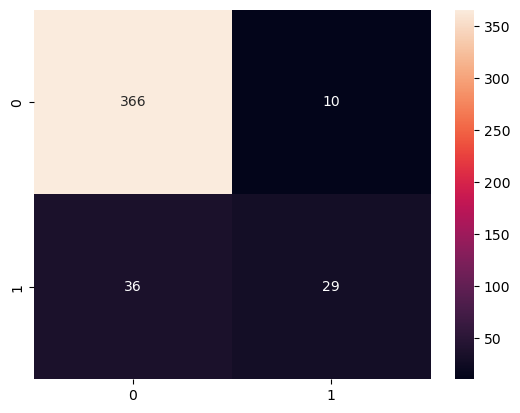

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

#### AdaBoost: Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [70]:
y_pred = model.predict(X_test)

print('Accuracy score is:', (accuracy_score(y_test,y_pred)))
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))
print('Classification report: \n', (classification_report(y_test,y_pred)))
print(f"Cross val score: {np.mean(cross_val_score(AdaBoostClassifier(),X_train,y_train,cv=2))}")

Accuracy score is: 0.8798185941043084
Confusion matrix: 
 [[361  15]
 [ 38  27]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       376
           1       0.64      0.42      0.50        65

    accuracy                           0.88       441
   macro avg       0.77      0.69      0.72       441
weighted avg       0.87      0.88      0.87       441

Cross val score: 0.8600562880132976


<span style = "color:orange"> Visualize confusion matrix </span>

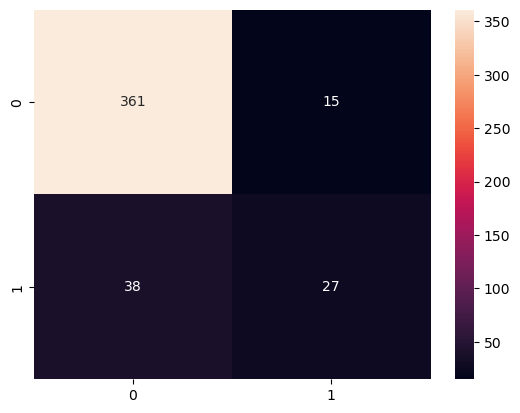

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

#### View score of different models in one dataframe

In [72]:
a1 = np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=2))
a2 = np.mean(cross_val_score(LogisticRegression(),X_train,y_train,cv=2))
a3 = np.mean(cross_val_score(SVC(),X_train,y_train,cv=2))
a4 = np.mean(cross_val_score(AdaBoostClassifier(),X_train,y_train,cv=2))

In [73]:
n = [a1,a2,a3,a4]

n = pd.DataFrame(n,columns=['Score'])
n = n.sort_values(by= 'Score', ascending = False)

n['Models'] = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression','Support Vector Machine','AdaBoost Classifier']})

In [74]:
n

,Score,Models
3,0.860056,AdaBoost Classifier
2,0.858111,Support Vector Machine
1,0.857153,Logistic Regression
0,0.852286,Random Forest Classifier


#### Use PCA to reduce dimensionality of the data

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
PCA(n_components=0.95)

PCA(n_components=0.95)

#### Apply the mapping (transform) to both the training set and the test set.

In [76]:
train_x = pca.fit_transform(X_train)
test_x = pca.fit_transform(X_test)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [77]:
from sklearn.ensemble import RandomForestClassifier

#### Create RandomForest model with the best parameter we got earlier and train it

In [78]:
model = RandomForestClassifier(max_depth=5, n_estimators=6, n_jobs=1, random_state=24)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=6, n_jobs=1, random_state=24)

#### Check the score of our model

In [79]:
model.score(X_train,y_train)

0.8882410106899903

#### Make predictions with X_test and check the accuracy score

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [81]:
print('Accuracy score is:', (accuracy_score(y_test,y_pred)))

Accuracy score is: 0.8798185941043084


#### Print Confusion matrix and Classification report

In [82]:
print('Confusion matrix: \n', (confusion_matrix(y_test,y_pred)))

Confusion matrix: 
 [[361  15]
 [ 38  27]]


In [83]:
print('Classification report: \n', (classification_report(y_test,y_pred)))

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       376
           1       0.64      0.42      0.50        65

    accuracy                           0.88       441
   macro avg       0.77      0.69      0.72       441
weighted avg       0.87      0.88      0.87       441

